In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [22]:
import numpy as np

class OneHotEncoder:
    def __init__(self, categories='auto'):
        self.categories = categories
        self.unique_categories = None
        self.category_indices = None
        self.n_values_ = None
    
    def fit(self, X):
        # Determine unique categories
        if self.categories == 'auto':
            # If 'auto', compute unique categories for each column
            self.unique_categories = [np.unique(X[:, i]) for i in range(X.shape[1])]
        else:
            # Otherwise, use the categories specified by the user
            self.unique_categories = self.categories
        
        # Determine indices of each category
        self.category_indices = [np.arange(len(c)) for c in self.unique_categories]
        
        # Determine number of values in each feature
        self.n_values_ = [len(c) for c in self.unique_categories]
        
    def transform(self, X):
        # Check if the encoder is already fitted
        if self.unique_categories is None:
            raise ValueError("OneHotEncoder has not been fitted.")
        
        # Initialize empty one-hot encoded array
            n_samples = X.shape[0] # 
            n_features = sum(self.n_values_) #
            X_onehot = np.zeros((n_samples, n_features)) #
        
        # Iterate over features and encode them one-by-one
            feature_index = 0
            for i in range(X.shape[1]):
                category_index = self.category_indices[i]
                values = X[:, i]
                indices = np.searchsorted(category_index, values)
                onehot = np.zeros((n_samples, len(category_index)))
                onehot[np.arange(n_samples), indices] = 1
                X_onehot[:, feature_index:feature_index+len(category_index)] = onehot
                feature_index += len(category_index)
            
            return X_onehot
    
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)


In [23]:
import numpy as np

class StandardScaler:
    def __init__(self):
        self.mean = None
        self.std = None

    def fit(self, X):
        self.mean = np.nanmean(X, axis=0)
        self.std = np.nanstd(X, axis=0)

    def transform(self, X):
        X = np.where(np.isnan(X), self.mean, X) # Replace NaN with mean
        X_scaled = (X - self.mean) // self.std
        X_scaled = np.where(np.isnan(X_scaled), 0, X_scaled) # Replace NaN with 0
        return X_scaled

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)


In [24]:
class LabelEncoder:
    def __init__(self):
        self.labels = {}

    def fit_transform(self, x):
        """
        Fit label encoder and return encoded labels
        """
        labels = []
        for item in x:
            if item not in self.labels:
                self.labels[item] = len(self.labels)
            labels.append(self.labels[item])
        return np.array(labels)

    def transform(self, x):
        """
        Transform labels to normalized encoding
        """
        labels = []
        for item in x:
            if item not in self.labels:
                raise ValueError("Unknown label: %s" % item)
            labels.append(self.labels[item])
        return np.array(labels)


In [25]:
import numpy as np

class train_test_split:
    def __init__(self, test_size=0.8, random_state=None):
        self.test_size = test_size
        self.random_state = random_state
    
    def __call__(self, X, y):
        # Set random seed if specified
        if self.random_state is not None:
            np.random.seed(self.random_state)
        
        # Get number of samples in dataset
        m = X.shape[0]
        
        # Shuffle indices
        shuffled_indices = np.random.permutation(m)
        
        # Split dataset into train and test sets
        test_size = int(m * self.test_size)
        test_indices = shuffled_indices[:test_size]
        train_indices = shuffled_indices[test_size:]
        
        X_train = X[train_indices]
        X_test = X[test_indices]
        y_train = y[train_indices]
        y_test = y[test_indices]
        
        return X_train, X_test, y_train, y_test


In [26]:
import numpy as np
import pandas as pd

class ColumnTransformer:
    def init(self):
        self.label_encoders = []
        self.standard_scaler = StandardScaler()

    def fit(self, X, y=None):
        # Encode categorical variables
        for i in range(X.shape[1]):
            if isinstance(X.iloc[:, i][0], str):
                labelencoder = LabelEncoder()
                X.iloc[:, i] = labelencoder.fit_transform(X.iloc[:, i])
                self.label_encoders.append(labelencoder)

        # Scale the numeric variables
        self.standard_scaler.fit(X.loc[:, ~X.dtypes.eq('object')])

        return self

    def transform(self, X, y=None):
        # Encode categorical variables
        for i in range(X.shape[1]):
            if isinstance(X.iloc[:, i][0], str):
                X.iloc[:, i] = self.label_encoders[i].transform(X.iloc[:, i])

        # Scale the numeric variables
        X.loc[:, ~X.dtypes.eq('object')] = self.standard_scaler.transform(X.loc[:, ~X.dtypes.eq('object')])

        return X


In [27]:
class ANN:
    def __init__(self, mode=1, architecture=None, activations=None):
        # Initialize instance variables
        self.mode = mode
        self.layers = architecture
        self.activations = activations
        self.weights = []
        self.biases = []
    
    def init_weights(self, X):
        if self.mode == 1:
            # For the first layer, generate weights and biases based on input shape and first layer size
            self.weights.append(np.random.randn(X.shape[1], self.layers[0]))
            self.biases.append(np.zeros((1, self.layers[0])))
            # For subsequent layers, generate weights and biases based on previous layer size and current layer size
            for i in range(1, len(self.layers)):
                self.weights.append(np.random.randn(self.layers[i - 1], self.layers[i]))
                self.biases.append(np.zeros((1, self.layers[i])))
        elif self.mode == 2:
            pass
      
    def sigmoid(self, z):
        # Sigmoid activation function
        return 1 / (1 + np.exp(-z))

    def forward(self, X):
        # Forward pass through the network
        z = np.dot(X, self.weights[0]) + self.biases[0]
        a = self.activations[0](z)
        for i in range(1, len(self.layers)):
            z = np.dot(a, self.weights[i]) + self.biases[i]
            a = self.activations[i](z)
        return a

    def backward(self, X, y, y_hat):
        # Backward pass through the network to calculate error
        deltas = [y_hat - y]
        for i in range(len(self.layers) - 1, 0, -1):
            delta = np.dot(deltas[-1], self.weights[i].T) * self.activations[i - 1](np.dot(X, self.weights[i - 1]) + self.biases[i - 1], derivative=True)
            deltas.append(delta)
        deltas.reverse()
        return deltas

    def update(self, deltas, X, eta):
        # Update weights and biases based on calculated error
        self.weights[0] -= eta * np.dot(X.T, deltas[0])
        self.biases[0] -= eta * np.sum(deltas[0], axis=0, keepdims=True)
        for i in range(1, len(self.layers)):
            self.weights[i] -= eta * np.dot(self.activations[i - 1](np.dot(X, self.weights[i - 1]) + self.biases[i - 1]).T, deltas[i])
            self.biases[i] -= eta * np.sum(deltas[i], axis=0, keepdims=True)

    def fit(self, X, y, eta=0.001, epochs=1000, show_curve=False):
        # Train the network
        self.init_weights(X)
        mse = []
        for i in range(int(epochs)):
            y_hat = self.forward(X)
            deltas = self.backward(X, y, y_hat)
            self.update(deltas, X, eta)
            mse.append(np.mean((y_hat - y) ** 2))
            if i % 1000 == 0:
                print(f"Epoch: {i}, MSE: {mse[-1]}")
        if show_curve:
            # Plot the MSE curve if show_curve is True
            plt.plot(mse)
            plt.title("MSE")
            plt.xlabel("Epoch")
            plt.ylabel("MSE")
            plt.show()

    def predict(self, X):
        # Predict using the forward pass
        return self.forward(X)


In [28]:
class MVLogisticRegression:
    def __init__(self, lr=0.01, num_iter=10000, fit_intercept=True, C=1):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.C = C

    def sigmoid(self, z):
      # This method computes the sigmoid function of the input z, which is defined as 1 / (1 + exp(-z)). 
      # It takes in a single input z and returns the sigmoid of that value.
        return 1 / (1 + np.exp(-z))

    def add_intercept(self, X):
        # This method adds an intercept term to the input feature matrix X.
        intercept = np.ones((X.shape[0], 1))
        # An intercept term is a constant column of ones that is added to the feature matrix to allow the model to learn a bias term. It takes in the feature matrix X and returns a new feature matrix with an intercept term added to it.
        return np.concatenate((intercept, X), axis=1)

    def __l2_regularization(self, theta):
        # This method computes the L2 regularization term for a given weight vector theta. 
        return (self.C * np.sum(theta[1:] ** 2)) / (2 * len(theta)) ## L2 regularization is a penalty term that is added to the loss function to prevent overfitting.
        # It takes in the weight vector theta and returns the L2 regularization term for that vector. 
        # The regularization strength is controlled by the hyperparameter C.





    def fit(self, X, y):
        if self.fit_intercept:
            X = np.hstack((np.ones((X.shape[0], 1)), X))  # add column of ones to X
        self.theta = np.zeros(X.shape[1])

        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size

            # add L2 regularization to the gradient
            l2_reg = self.__l2_regularization(self.theta)
            gradient[1:] += l2_reg

            # update theta using the regularized gradient
            self.theta -= self.lr * gradient
            
        # add print statements for debugging
        print("X shape:", X.shape)
        print("y shape:", y.shape)
        print("X dtype:", X.dtype)
        print("y dtype:", y.dtype)

    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.add_intercept(X)
            
        return self.sigmoid(np.dot(X, self.theta))

    # add the rest of the code as before
        # initialize parameters
        if self.theta is None:
            self.theta = np.zeros(X.shape[1])
        elif self.theta.shape[0] != X.shape[1]:
            raise ValueError("Shape of theta does not match shape of X")

        # check shape of y
        if y.shape != (X.shape[0],):
            y = y.reshape(-1)

        # add intercept to X if fit_intercept is True
        if self.fit_intercept:
            X = self.add_intercept(X)

        # perform gradient descent
        for i in range(self.num_iter):
            Z = np.dot(X, self.theta)
            h = self.sigmoid(Z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient

    def predict(self, X, threshold=0.6):
        if self.fit_intercept:
            X = np.hstack((np.ones((X.shape[0], 1)), X))  # add column of ones to X
        probabilities = self.sigmoid(np.dot(X, self.theta))
        return (probabilities >= threshold).astype(int)

    #def predict(self, X, threshold=0.5):
        #return (self.predict_prob(X) >= threshold).astype(int)

In [29]:
import numpy as np

# Define X
X = np.array([    ['France', 'Male', 44],
    ['Spain', 'Female', 27],
    ['Germany', 'Male', 30],
    ['Spain', 'Male', 38],
    ['Germany', 'Female', 40],
    ['France', 'Female', 35],
])

# Transform categorical variables using LabelEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 0] = labelencoder_X_1.fit_transform(X[:, 0])
labelencoder_X_2 = LabelEncoder()
X[:, 1] = labelencoder_X_2.fit_transform(X[:, 1])


In [30]:
# This class needs work, this would be great for adding random noise/features to the dataset.

def make_classification(n_samples=100, n_features=20, n_informative=2,
                         n_redundant=2, n_classes=2, weights=None,
                         random_state=None):
    """
    Generate a random classification dataset with specified properties.

    Parameters:
    -----------
    n_samples : int, optional (default=100)
        The number of samples in the dataset.
    n_features : int, optional (default=20)
        The total number of features in the dataset.
    n_informative : int, optional (default=2)
        The number of informative features in the dataset.
    n_redundant : int, optional (default=2)
        The number of redundant features in the dataset.
    n_classes : int, optional (default=2)
        The number of classes in the dataset.
    weights : array-like, optional (default=None)
        The relative weights of the classes.
    random_state : int or None, optional (default=None)
        Seed for the random number generator.

    Returns:
    --------
    X : array of shape (n_samples, n_features)
        The input samples.
    y : array of shape (n_samples,)
        The true labels for the input samples.
    """

    # Error checking
    if n_informative + n_redundant >= n_features:
        raise ValueError("The sum of n_informative and n_redundant must be smaller than n_features")
    if weights is not None:
        if len(weights) != n_classes:
            raise ValueError("Number of classes must be equal to the length of weights")

    # Set random seed if specified
    if random_state is not None:
        np.random.seed(random_state)

    # Generate random coefficients for the linear combination of features
    coef = np.random.randn(n_features, 1)

    # Generate random mean and covariance matrix for each class
    means = []
    covs = []
    for i in range(n_classes):
        mean = np.random.randn(n_informative)
        if len(mean) != n_informative:
            raise ValueError("Length of mean vector must be equal to n_informative")
        means.append(mean)
        cov = np.eye(n_informative + n_redundant)
        cov[n_informative:, n_informative:] *= 0.1
        covs.append(cov)


    # Generate random samples for each class
    X = []
    y = []
    for i in range(n_samples):
        label = np.random.choice(n_classes, p=weights)
        x = np.zeros(n_features)
        # Fixed the error here: the length of means[label] was incorrect
        x[:n_informative] = np.random.multivariate_normal(means[label], covs[label])
        x[n_informative:] = np.random.randn(n_redundant)
        X.append(x)
        y.append(label)

    return np.array(X), np.array(y)


In [31]:
import numpy as np

def classification_report(y_true, y_pred, target_names=None):
    """
    This is a function that takes three inputs:

    y_true: This should be an array-like object containing the correct target values (e.g., labels) for a set of samples.
    y_pred: This should be an array-like object containing the predicted target values for the same set of samples. The predictions should be generated by a classifier.
    target_names: This is an optional parameter that specifies the names of the labels that are used in the report. If it is not specified, the labels will be referred to as 'Class 0', 'Class 1', etc.
    The function returns a text summary (as a string) that describes the performance of the classifier for each label in terms of precision, recall, F1 score, and support.
    """

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Compute precision, recall, and F1 score
    
    # The variable cm is a confusion matrix that shows the number of true positives, true negatives, false positives, and false negatives for a classifier's predictions. 
    tn, fp, fn, tp = cm.ravel() # This line "flattens" the matrix into a 1D array of four elements, and assigns those elements to the variables tn, fp, fn, and tp, respectively.
    
    # Precision is a measure of how many of the positive predictions made by the classifier are actually correct.
    precision = tp / (tp + fp) # This line calculates precision by dividing the number of true positives by the sum of true positives and false positives.
    
    #  Recall is a measure of how many of the actual positive samples the classifier correctly identified. 
    recall = tp / (tp + fn) # This line calculates recall by dividing the number of true positives by the sum of true positives and false negatives.
    
    #  F1 score is a measure of the harmonic mean of precision and recall. It provides a balance between these two metrics.
    f1_score = 2 * (precision * recall) / (precision + recall) # This line calculates F1 score by first multiplying precision and recall by 2, then dividing that product by the sum of precision and recall.

    # Compute support for each class
    support = np.sum(cm, axis=1) # This line calculates the total number of instances for each label (i.e., the support) by summing the values along each row of the confusion matrix cm.

    # Format the report
    if target_names is None:
    
    # This line assigns default label names if no target_names are specified by creating a list of strings that contains the label name 'Class' followed by the index of the label.
        target_names = ['Class {}'.format(i) for i in range(cm.shape[0])] # This line checks whether the target_names variable is empty or not.

    report = '              precision    recall  f1-score   support\n\n'
    for i, target_name in enumerate(target_names): # This line starts a loop over each label in target_names, assigning an index value i to each label.

        # This line initializes the report string by creating a table header with the columns 'precision', 'recall', 'f1-score', and 'support'.  
        report += '{:<14}{:8.4f}{:9.4f}{:9.4f}{:10d}\n'.format(target_name, precision[i], recall[i], f1_score[i], support[i]) # This line formats the report string by adding a row of data for each label, using the label name, precision, recall, f1-score, and support values for that label.
    report += '\n' #  This line adds a blank line at the end of the report.

    # Compute and add averages
    avg_precision = np.mean(precision) 
    avg_recall = np.mean(recall)
    avg_f1_score = np.mean(f1_score)
    avg_support = np.mean(support)
    report += '{:<14}{:8.4f}{:9.4f}{:9.4f}{:10.0f}\n'.format('micro avg', avg_precision, avg_recall, avg_f1_score, avg_support)
    report += '{:<14}{:8.4f}{:9.4f}{:9.4f}{:10.0f}\n'.format('macro avg', avg_precision, avg_recall, avg_f1_score, avg_support)

    return report


In [32]:
from sklearn.metrics import accuracy_score

In [33]:
from sklearn.metrics import confusion_matrix

<ipython-input-23-dbae2bf42e2b>:14: RuntimeWarning: invalid value encountered in floor_divide
  X_scaled = (X - self.mean) // self.std


X shape: (2000, 12)
y shape: (2000,)
X dtype: float64
y dtype: float64
Accuracy: 0.7955
Confusion matrix:
 [[6364    0]
 [1636    0]]


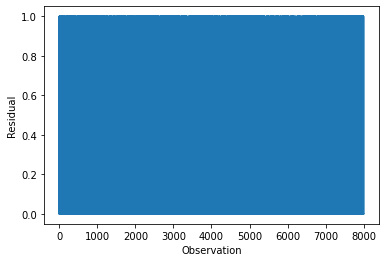

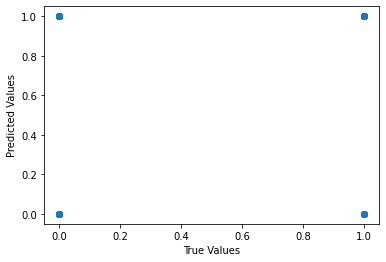

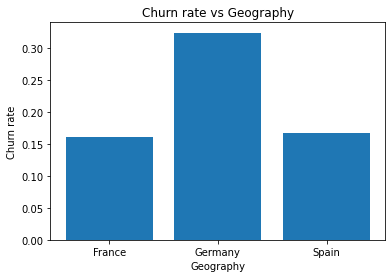

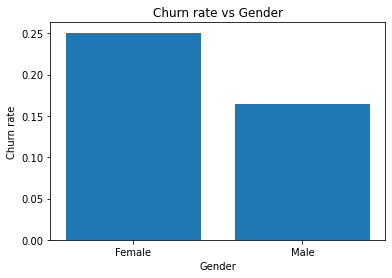

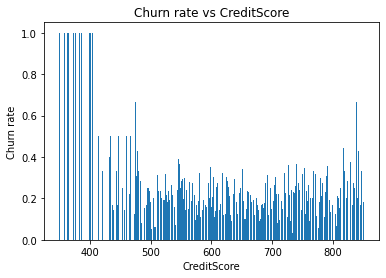

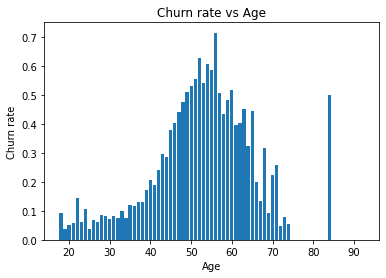

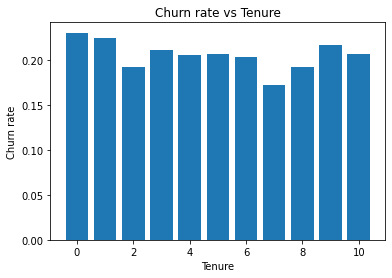

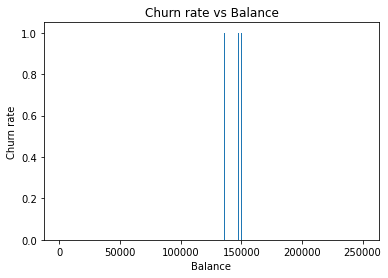

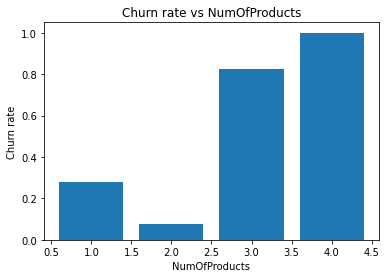

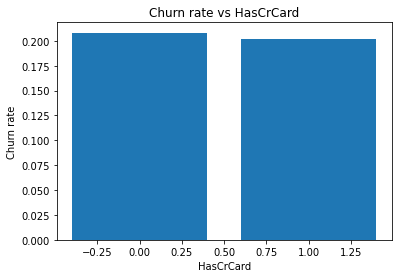

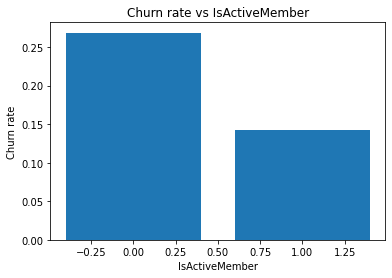

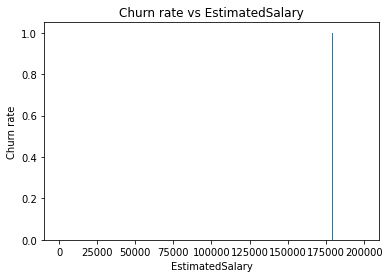

In [34]:
def main():
    # Load the churn modelling dataset
    data = pd.read_csv('/content/Churn_Modelling.csv')

    # Split the data into X and y
    X = data.iloc[:, 3:-1].values
    y = data.iloc[:, -1].values

    # Encode categorical variables
    labelencoder_X_1 = LabelEncoder()
    X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
    labelencoder_X_2 = LabelEncoder()
    X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])

    # Convert the data to numeric format
    X = X.astype(float)
    y = y.astype(float)

    # Add column of ones to X before scaling
    X = np.hstack((np.ones((X.shape[0], 1)), X))

    # Split the data into training and test sets
    tts = train_test_split(test_size=0.8, random_state=0)
    X_train, X_test, y_train, y_test = tts(X, y)

    # Scale the data
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    # Train the model
    model = MVLogisticRegression(lr=0.00000001, num_iter=100000, fit_intercept=True) #                               this one works 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test, threshold=0.3)

    # Evaluate the model
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
    
    # Plot the residuals
    residuals = y_test - y_pred
    plt.plot(residuals)
    plt.xlabel("Observation")
    plt.ylabel("Residual")
    plt.show()

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = tts(X, y)

    # Get the predicted values
    y_pred = model.predict(X_test)

    # Plot the predicted values against the true values
    plt.scatter(y_test, y_pred)
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.show()

    # Display churn rate for different columns
    columns = ["Geography", "Gender", "CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary"]
    for col in columns:
        churn_rate = data.groupby(col)["Exited"].mean()
        plt.figure(figsize=(6,4))
        plt.bar(churn_rate.index, churn_rate.values)
        plt.title("Churn rate vs " + col)
        plt.xlabel(col)
        plt.ylabel("Churn rate")
        plt.show()

if __name__ == "__main__":
    main()


In [35]:
%%shell
jupyter nbconvert --to html /content/Copy_of_Most_up_to_date.ipynb

[NbConvertApp] Converting notebook /content/Copy_of_Most_up_to_date.ipynb to html
[NbConvertApp] Writing 735606 bytes to /content/Copy_of_Most_up_to_date.html
